In [21]:
import pandas as pd
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#from keras.models import Sequential
#from keras.layers import Dense



# Load the datasets
X_train = pd.read_csv('saved_datasets/X_train.csv')
#set product id and user id as index
X_train.set_index(['product_id','user_id'], inplace=True)

X_val = pd.read_csv('saved_datasets/X_val.csv')
#set product id and user id as index
X_val.set_index(['product_id','user_id'], inplace=True)

X_test = pd.read_csv('saved_datasets/X_test.csv')
#set product id and user id as index
X_test.set_index(['product_id','user_id'], inplace=True)

y_train = pd.read_csv('saved_datasets/y_train.csv')
y_val = pd.read_csv('saved_datasets/y_val.csv')
y_test = pd.read_csv('saved_datasets/y_test.csv')

selected_feature = ['aisle_fresh fruits', 'aisle_packaged vegetables fruits', 'avg_days_since_prior_order', 'avg_products', 'days_since_prior_order', 'department_dairy eggs', 'department_pantry', 'department_produce', 'department_snacks', 'most_common_order_dow_0', 'most_common_order_dow_1', 'most_common_order_dow_5', 'order_dow_0', 'order_dow_1', 'order_dow_3', 'order_dow_4', 'order_dow_6', 'order_hour_of_day_afternoon', 'order_hour_of_day_evening','total_orders']
top_15 = selected_feature[0:15]
X_train_selected = X_train[top_15]
X_val_selected = X_val[top_15]
X_test_selected = X_test[top_15]

In [22]:
X_train.head()

,,add_to_cart_order,order_number,days_since_prior_order,avg_days_since_prior_order,total_orders,avg_products,order_dow_0,order_dow_1,order_dow_2,order_dow_3,...,department_pets,department_produce,department_snacks,most_common_order_dow_0,most_common_order_dow_1,most_common_order_dow_2,most_common_order_dow_3,most_common_order_dow_4,most_common_order_dow_5,most_common_order_dow_6
product_id,user_id,,,,,,,,,,,,,,,,,,,,,
32611,2063,12,3,21.0,20.782609,4,6.387097,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
37382,184,28,11,4.0,21.355769,12,9.649573,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
34005,912,3,2,6.0,7.365854,7,6.180000,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
41844,1990,10,31,5.0,9.385915,42,8.796089,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
30427,236,6,42,18.0,6.155280,45,8.036697,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [24]:

# Define the models
xgb_model = XGBClassifier()
lgbm_model = LGBMClassifier()
catboost_model = CatBoostClassifier()

# For deep learning, we define a simple function to create the model
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=X_train_selected.shape[1], activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Define the stacking ensemble
estimators = [
    ('xgb', xgb_model),
    ('lgbm', lgbm_model),
    ('catboost', catboost_model),
]
stacking_model = StackingClassifier(estimators=estimators, final_estimator=XGBClassifier())

In [25]:
print(X_train_selected.shape)
print(y_train.shape)

(216470, 15)
(216470, 1)


In [26]:

# Fit the models
print("Training XGBoost...")
xgb_model.fit(X_train_selected, y_train)

print("Training LightGBM...")
lgbm_model.fit(X_train_selected, y_train)

print("Training CatBoost...")
catboost_model.fit(X_train_selected, y_train, silent=True)


print("Training Stacking Ensemble...")
stacking_model.fit(X_train_selected, y_train)

# Validate the models on the validation set
print("Evaluating XGBoost...")
xgb_val_pred = xgb_model.predict(X_val_selected)

print("Evaluating LightGBM...")
lgbm_val_pred = lgbm_model.predict(X_val_selected)

print("Evaluating CatBoost...")
catboost_val_pred = catboost_model.predict(X_val_selected)

print("Evaluating Stacking Ensemble...")
stacking_val_pred = stacking_model.predict(X_val_selected)


Training XGBoost...
Training LightGBM...


c:\Users\tashf\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\tashf\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 126313, number of negative: 90157
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014543 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 565
[LightGBM] [Info] Number of data points in the train set: 216470, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.583513 -> initscore=0.337210
[LightGBM] [Info] Start training from score 0.337210
Training CatBoost...
Training Stacking Ensemble...


c:\Users\tashf\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\tashf\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 126313, number of negative: 90157
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016814 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 565
[LightGBM] [Info] Number of data points in the train set: 216470, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.583513 -> initscore=0.337210
[LightGBM] [Info] Start training from score 0.337210
Learning rate set to 0.102364
0:	learn: 0.6745337	total: 227ms	remaining: 3m 46s
1:	learn: 0.6603060	total: 293ms	remaining: 2m 25s
2:	learn: 0.6489919	total: 334ms	remaining: 1m 50s
3:	learn: 0.6400538	total: 386ms	remaining: 1m 35s
4:	learn: 0.6328727	total: 436ms	remaining: 1m 26s
5:	learn: 0.6272757	total: 492ms	remaining: 1m 21s
6:	learn: 0.6227689	total: 

In [27]:
print("XGBoost Accuracy:", accuracy_score(y_val, xgb_val_pred))
print("LightGBM Accuracy:", accuracy_score(y_val, lgbm_val_pred))
print("CatBoost Accuracy:", accuracy_score(y_val, catboost_val_pred))
print("Stacking Ensemble Accuracy:", accuracy_score(y_val, stacking_val_pred))

XGBoost Accuracy: 0.65374232675098
LightGBM Accuracy: 0.6729162044227498
CatBoost Accuracy: 0.6592892537534206
Stacking Ensemble Accuracy: 0.6392278677612603


In [28]:
from sklearn.metrics import confusion_matrix


# XGBoost Confusion Matrix
xgb_conf_matrix = confusion_matrix(y_val, xgb_val_pred)
print("XGBoost Confusion Matrix:")
print(xgb_conf_matrix)

# LightGBM Confusion Matrix
lgbm_conf_matrix = confusion_matrix(y_val, lgbm_val_pred)
print("\nLightGBM Confusion Matrix:")
print(lgbm_conf_matrix)

# CatBoost Confusion Matrix
catboost_conf_matrix = confusion_matrix(y_val, catboost_val_pred)
print("\nCatBoost Confusion Matrix:")
print(catboost_conf_matrix)

# Stacking Ensemble Confusion Matrix
stacking_conf_matrix = confusion_matrix(y_val, stacking_val_pred)
print("\nStacking Ensemble Confusion Matrix:")
print(stacking_conf_matrix)

XGBoost Confusion Matrix:
[[11143 11363]
 [ 7364 24214]]

LightGBM Confusion Matrix:
[[ 9884 12622]
 [ 5068 26510]]

CatBoost Confusion Matrix:
[[11237 11269]
 [ 7158 24420]]

Stacking Ensemble Confusion Matrix:
[[12180 10326]
 [ 9186 22392]]


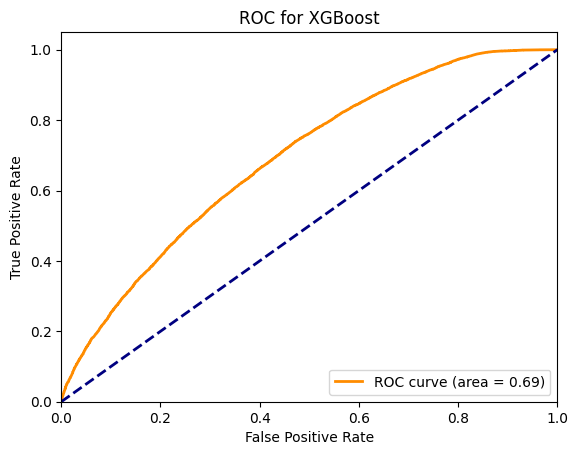

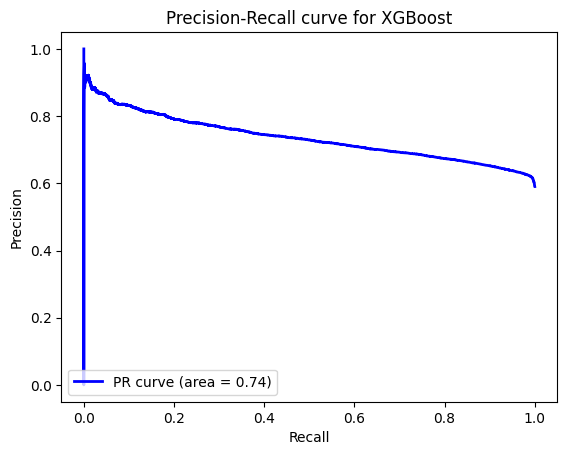

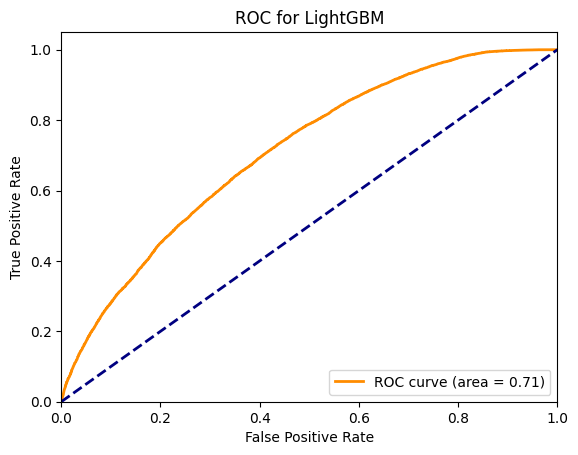

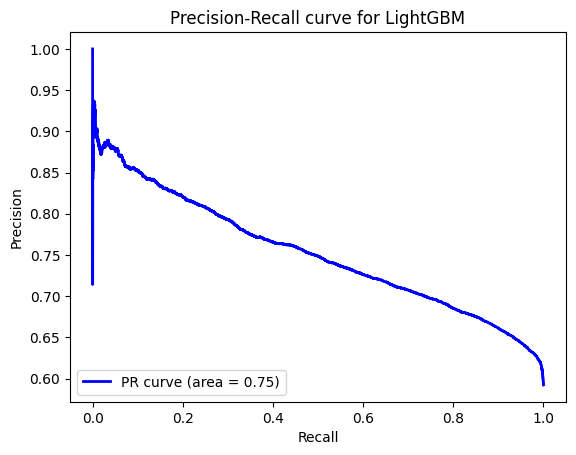

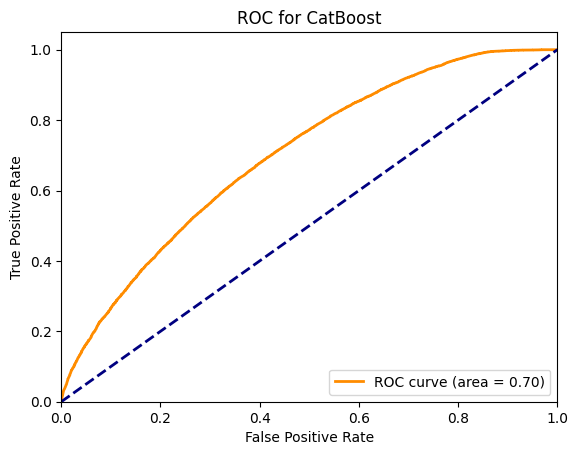

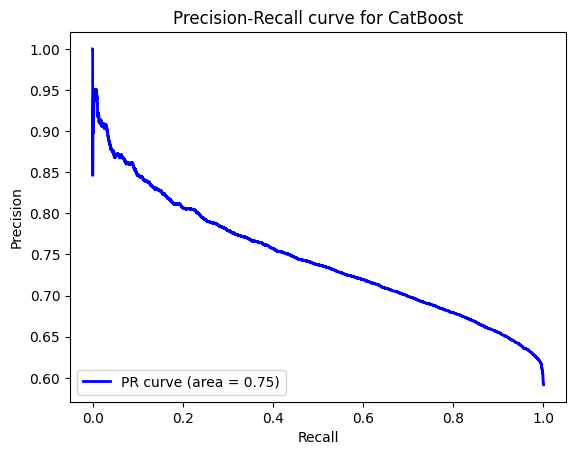

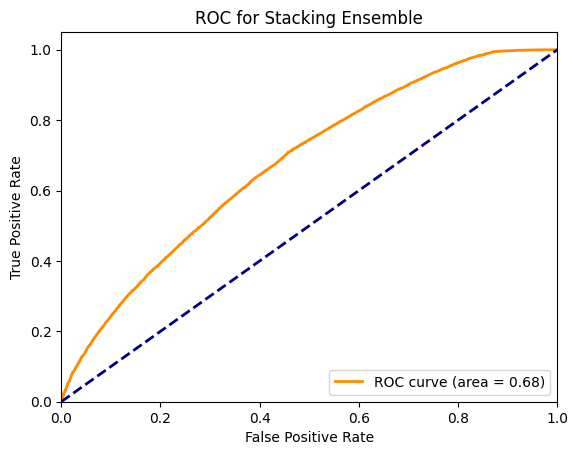

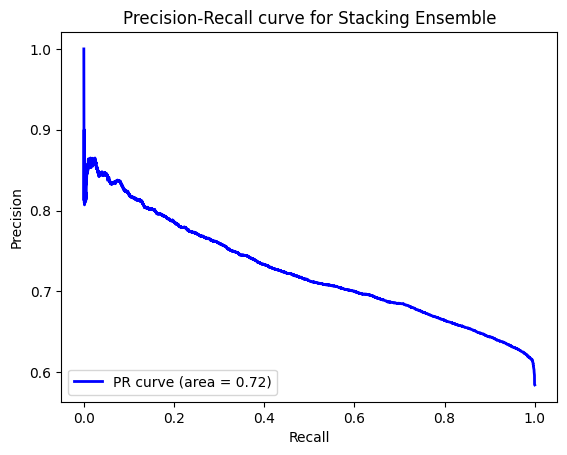

In [29]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import numpy as np

# Function to plot ROC Curve
def plot_roc_curve(y_true, y_scores, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC for {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# Function to plot Precision-Recall Curve
def plot_precision_recall_curve(y_true, y_scores, model_name):
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    pr_auc = average_precision_score(y_true, y_scores)

    plt.figure()
    lw = 2
    plt.plot(recall, precision, color='blue', lw=lw, label='PR curve (area = %0.2f)' % pr_auc)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall curve for {model_name}')
    plt.legend(loc="lower left")
    plt.show()

xgb_val_probs = xgb_model.predict_proba(X_val_selected)[:, 1]
lgbm_val_probs = lgbm_model.predict_proba(X_val_selected)[:, 1]
catboost_val_probs = catboost_model.predict_proba(X_val_selected)[:, 1]
stacking_val_probs = stacking_model.predict_proba(X_val_selected)[:, 1]

# Plot ROC and PR curves for each model
plot_roc_curve(y_val, xgb_val_probs, "XGBoost")
plot_precision_recall_curve(y_val, xgb_val_probs, "XGBoost")

plot_roc_curve(y_val, lgbm_val_probs, "LightGBM")
plot_precision_recall_curve(y_val, lgbm_val_probs, "LightGBM")

plot_roc_curve(y_val, catboost_val_probs, "CatBoost")
plot_precision_recall_curve(y_val, catboost_val_probs, "CatBoost")

plot_roc_curve(y_val, stacking_val_probs, "Stacking Ensemble")
plot_precision_recall_curve(y_val, stacking_val_probs, "Stacking Ensemble")


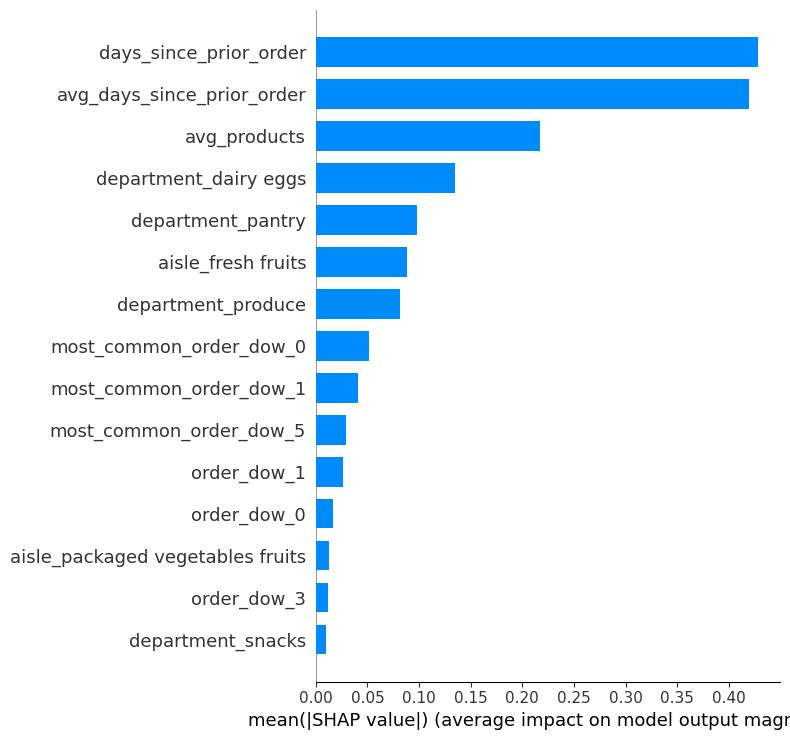

In [30]:
import shap

# Create the SHAP Explainer for XGBoost
xgb_explainer = shap.Explainer(xgb_model)
xgb_shap_values = xgb_explainer.shap_values(X_train_selected)

# Plot
shap.summary_plot(xgb_shap_values, X_train_selected, plot_type="bar")


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


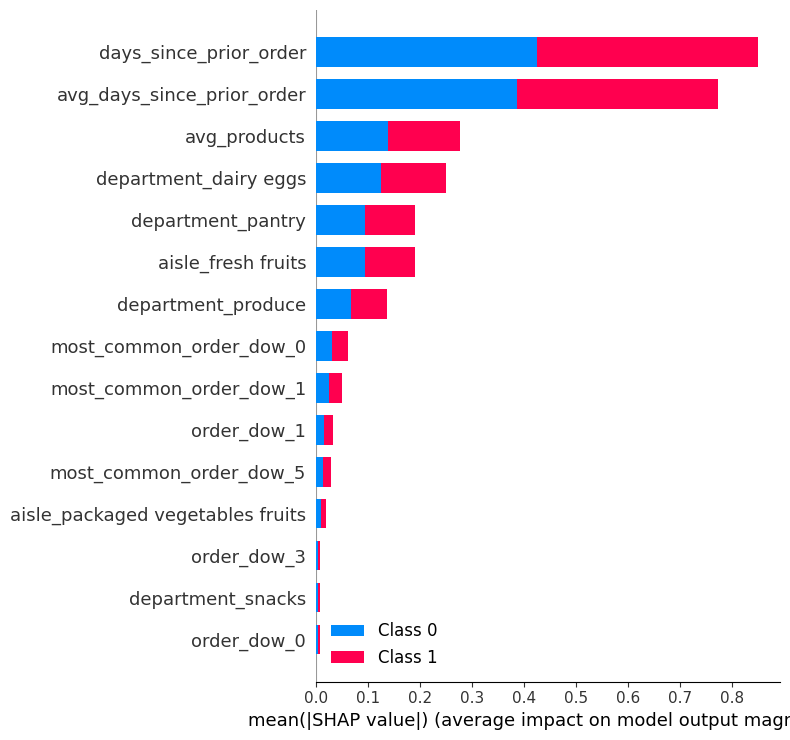

In [31]:
# Create the SHAP Explainer for LightGBM
lgbm_explainer = shap.Explainer(lgbm_model)
lgbm_shap_values = lgbm_explainer.shap_values(X_train_selected)

# Plot
shap.summary_plot(lgbm_shap_values, X_train_selected, plot_type="bar")


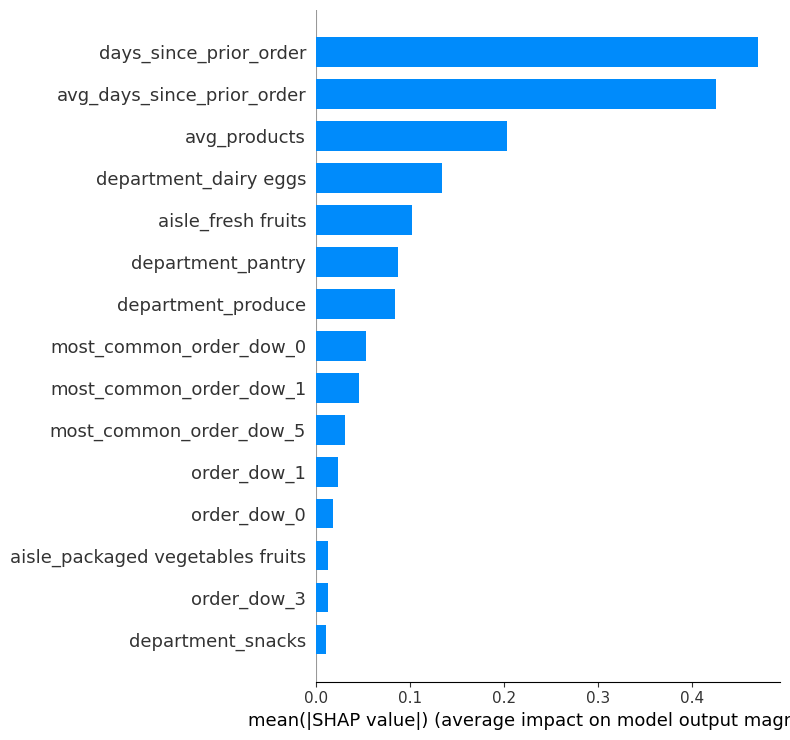

In [32]:
# Create the SHAP Explainer for CatBoost
catboost_explainer = shap.Explainer(catboost_model)
catboost_shap_values = catboost_explainer.shap_values(X_train_selected)

# Plot
shap.summary_plot(catboost_shap_values, X_train_selected, plot_type="bar")


In [36]:
from lime import lime_tabular
import numpy as np

# Create a LIME Tabular Explainer
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train_selected),
    feature_names=X_train_selected.columns,
    class_names=['Negative', 'Positive'],
    mode='classification'
)

# Choose an instance to explain
instance_index = 1  # Change this to the index of the instance you want to explain
instance = X_val_selected.iloc[instance_index]

# Generate the explanation for the chosen instance
exp = explainer.explain_instance(
    data_row=instance,
    predict_fn=stacking_model.predict_proba
)

# Visualize the explanation
exp.show_in_notebook(show_table=True, show_all=False)


In [38]:
import optuna
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the datasets
X_train = pd.read_csv('saved_datasets/X_train.csv')
#set product id and user id as index
X_train.set_index(['product_id','user_id'], inplace=True)

X_val = pd.read_csv('saved_datasets/X_val.csv')
#set product id and user id as index
X_val.set_index(['product_id','user_id'], inplace=True)

X_test = pd.read_csv('saved_datasets/X_test.csv')
#set product id and user id as index
X_test.set_index(['product_id','user_id'], inplace=True)

y_train = pd.read_csv('saved_datasets/y_train.csv')
y_val = pd.read_csv('saved_datasets/y_val.csv')
y_test = pd.read_csv('saved_datasets/y_test.csv')


selected_feature = ['aisle_fresh fruits', 'aisle_packaged vegetables fruits', 'avg_days_since_prior_order', 'avg_products', 'days_since_prior_order', 'department_dairy eggs', 'department_pantry', 'department_produce', 'department_snacks', 'most_common_order_dow_0', 'most_common_order_dow_1', 'most_common_order_dow_5', 'order_dow_0', 'order_dow_1', 'order_dow_3', 'order_dow_4', 'order_dow_6', 'order_hour_of_day_afternoon', 'order_hour_of_day_evening','total_orders']
top_15 = selected_feature[0:15]
X_train_selected = X_train[top_15]
X_val_selected = X_val[top_15]
X_test_selected = X_test[top_15]

def objective(trial):
    # Hyperparameters to be tuned by Optuna
    param = {
        'iterations': trial.suggest_int('iterations', 50, 300),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),
        'random_strength': trial.suggest_int('random_strength', 0, 100),
        'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),
        'od_type': trial.suggest_categorical('od_type', ['IncToDec', 'Iter'])
    }

    # Split your data
    X_train, X_valid, y_t, y_valid = train_test_split(X_train_selected, y_train, test_size=0.2)

    # Create and fit the model
    model = CatBoostClassifier(**param, verbose=0)
    model.fit(X_train, y_t)

    # Predict and calculate accuracy
    preds = model.predict(X_valid)
    accuracy = accuracy_score(y_valid, preds)
    return accuracy


In [39]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

# Best hyperparameters
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)


[I 2024-02-21 14:42:48,649] A new study created in memory with name: no-name-a6fc12bf-07f6-4cf5-86e5-fdc08d02107b
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
[I 2024-02-21 14:42:59,210] Trial 0 finished with value: 0.6972559708042685 and parameters: {'iterations': 250, 'depth': 6, 'learning_rate': 0.237316714194818, 'random_strength': 77, 'bagging_temperature': 0.3866306572243471, 'od_type': 'Iter'}. Best is trial 0 with value: 0.6972559708042685.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed 

Number of finished trials: 10
Best trial: {'iterations': 268, 'depth': 7, 'learning_rate': 0.2134471815921945, 'random_strength': 20, 'bagging_temperature': 0.9850587786930319, 'od_type': 'IncToDec'}


In [40]:
best_params = study.best_trial.params
best_model = CatBoostClassifier(**best_params, verbose=0)
best_model.fit(X_train_selected, y_train)


In [41]:
# Validate the model on the validation set
val_pred = best_model.predict(X_val_selected)
print("CatBoost Accuracy:", accuracy_score(y_val, val_pred))

# Test the model on the test set
test_pred = best_model.predict(X_test_selected)

# Save the model
best_model.save_model('catboost_model.cbm')

CatBoost Accuracy: 0.6646512831891133


In [42]:
# save the joblib model
import joblib

# Save the model as a pickle in a file
joblib.dump(best_model, 'catboost_model.pkl')

['catboost_model.pkl']